# Cluster Evaluation

## How many clusters do I use?

### Performance of clusters

Imagine I had used 
- 1 cluster.

In [69]:
kmeans = KMeans(1)

kmeans.fit(X)

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [70]:
len(X)

50

In [72]:
kmeans.inertia_

200.0

- 2 clusters

In [73]:
kmeans = KMeans(2)

kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [74]:
kmeans.inertia_

104.96163315756871

# Inertia (Distortion):  

## Definition: mean sum of squared distances to centers

In [75]:
for n_clusters in range(1,10):
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    print(kmeans.inertia_)
    

200.0
104.96163315756871
80.08569526137276
57.55425863091105
50.071170568930896
44.195451280860624
41.73909877629872
36.541045078547725
32.80847863981355


In [83]:
inertia = []
for n_clusters in range(1,10):
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    print(kmeans.inertia_)
    inertia.append(kmeans.inertia_)

200.0
104.96163315756871
80.08569526137276
57.55425863091105
50.333273851849064
45.48457611952801
40.04193172475098
35.117481871789806
31.771893005291567


# The Elbow Method (COTOVELO)

Text(0, 0.5, 'Inertia (Distortion)')

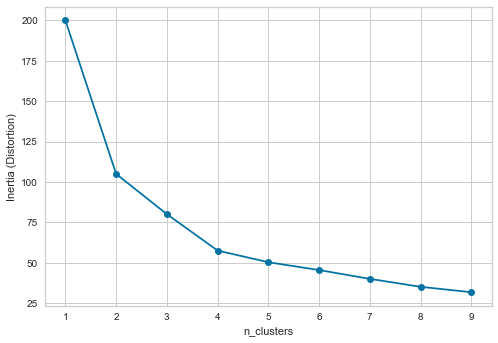

In [84]:
plt.plot(range(1,10), inertia, '-o')
plt.xlabel('n_clusters')
plt.ylabel('Inertia (Distortion)')

In [48]:
kmeans.inertia_

31.64723878920327

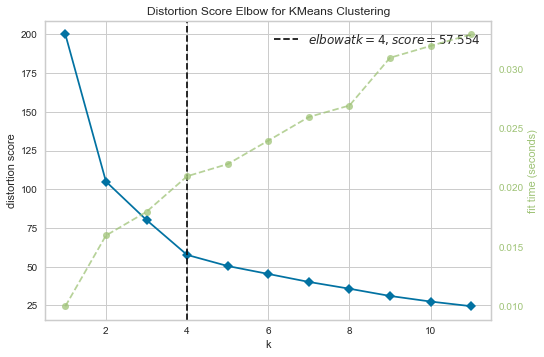

In [85]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Silhouette


The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters.

The silhouette ranges from −1 to +1


In [86]:
from yellowbrick.cluster import SilhouetteVisualizer

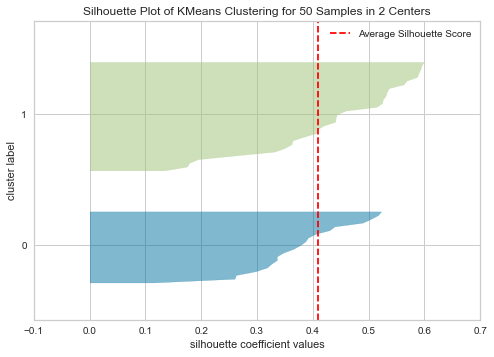

In [93]:
model = KMeans(2).fit(X)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [87]:
model = KMeans(4).fit(X)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

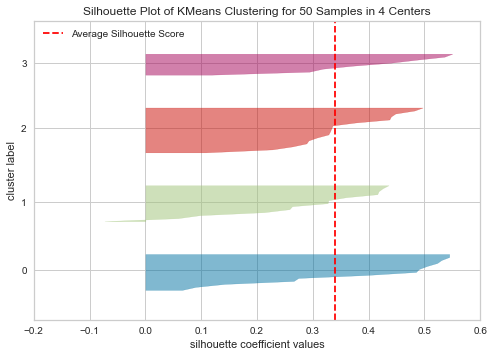

In [88]:

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

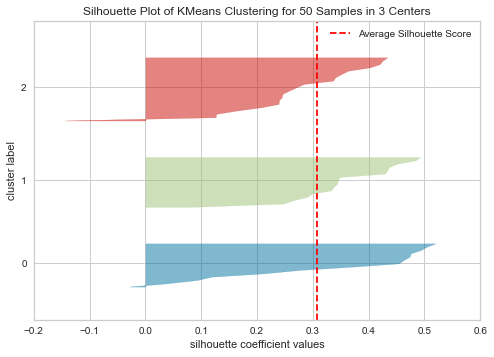

In [92]:
model = KMeans(3).fit(X)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

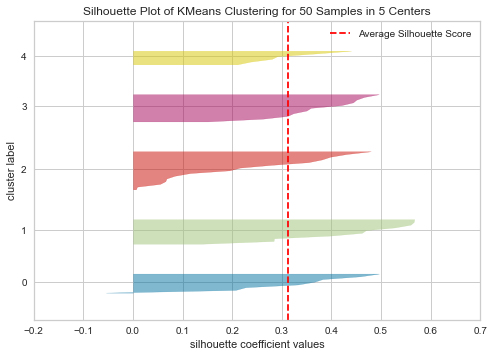

In [101]:
model = KMeans(5).fit(X)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [102]:
kmeans = KMeans(4)
kmeans.fit(X_std)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

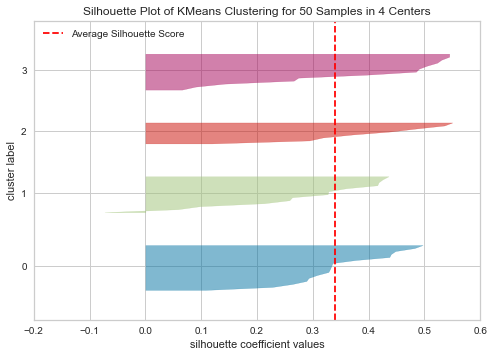

In [106]:
model = KMeans(4).fit(X)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

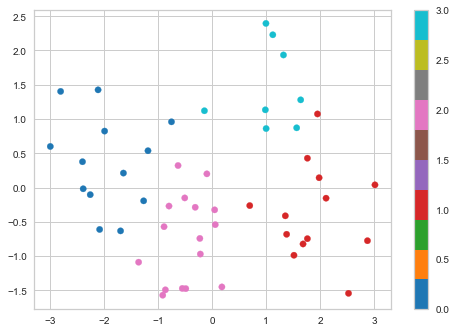

In [104]:
plt.scatter(components[:, 0], 
            components[:, 1], 
            s=40, c=kmeans.labels_, cmap='tab10');
plt.colorbar();

In [112]:
def plot_circle_regions(X, k, xlim=(-4,4), ylim=(-4, 4), cmap='tab10'):

    from scipy.spatial.distance import cdist
    kmeans = KMeans(k).fit(X)
    centers = kmeans.cluster_centers_
    radii = [cdist(X[kmeans.labels_ == i], [center]).max() for i, center in enumerate(centers)]

    fig, ax = plt.subplots(figsize=(12,8))

    ax.scatter(X[:, 0], X[:, 1], s=40, c=kmeans.labels_, cmap=cmap);

    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='b', lw=3, alpha=0.3, zorder=1))

    #ax.set_xlim(xlim)
    #ax.set_ylim(ylim)
    plt.gca().set_aspect('equal', adjustable='box')



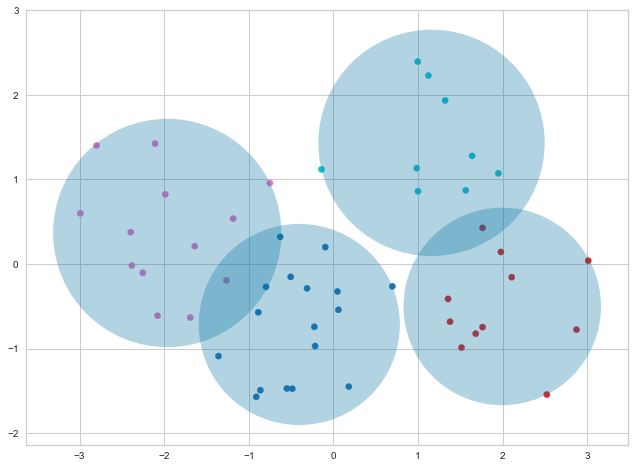

In [113]:
plot_circle_regions(components, 4, )